In [37]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [21]:
with open("/home/luca/ml-malware-concept-drift/data/dataset/dataset.pickle", "rb") as f:
    df = pickle.load(f)

In [22]:
with open("/home/luca/ml-malware-concept-drift/data/dataset/dataset_opcodes.pickle", "rb") as f:
    df_opcodes = pickle.load(f).reset_index()
df_opcodes.head()

,sample_hash,opcode_nop,opcode_pushal,opcode_call,opcode_jmp,opcode_push,opcode_ret,opcode_mov,opcode_add,opcode_sub,...,opcode_movzx movzx add,opcode_stosd stosd stosd,opcode_sub je push,opcode_je nop,opcode_add adc mov,opcode_mov mov nop,opcode_mov adc mov,opcode_adc mov mov,opcode_cmove,opcode_cmovne
0,cfa2d5eeac7de9f134cb2e36d54a5c4053f62fdf9d5302...,1.103859,4.172515,1.427803,1.249632,0.621502,1.122165,0.696779,0.652702,0.757788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00ebebc75f61527282cee19ab7aed80693b63fbb969e71...,0.000000,0.000000,0.250472,1.276612,0.374201,0.000000,0.083197,0.343960,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e69...,3.437535,0.000000,1.899824,1.764913,0.753238,1.420932,0.721521,0.808169,0.800710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d694a203bb211751669f8742db877e8ebd5eff5b126abc...,0.854062,1.206127,2.551651,2.175398,0.978553,2.046073,1.010348,0.724339,1.200611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15c9feb810c48ffef1c7e32cbe58a11037da94e958fb1f...,0.000000,0.000000,2.365716,1.734033,0.941145,1.908532,0.895330,0.549209,1.016423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df1 = df.reset_index()
df_final = pd.merge(left=df1, right=df_opcodes, on="sample_hash")

In [24]:
df_final.shape

(67000, 44732)

In [25]:
df = df_final
df.set_index("sample_hash", inplace=True)
df.head()

,generic_fileSize,generic_fileEntropy,header_SizeOfHeaders,header_AddressOfEntryPoint,header_ImageBase,header_SizeOfImage,header_SizeOfCode,header_SizeOfInitializedData,header_SizeOfUninitializedData,header_BaseOfCode,...,opcode_movzx movzx add,opcode_stosd stosd stosd,opcode_sub je push,opcode_je nop,opcode_add adc mov,opcode_mov mov nop,opcode_mov adc mov,opcode_adc mov mov,opcode_cmove,opcode_cmovne
sample_hash,,,,,,,,,,,,,,,,,,,,,
cfa2d5eeac7de9f134cb2e36d54a5c4053f62fdf9d5302994557da1287719414,1666137,7.996651,1024,5358807,4194304,5365760,310272,56832,0,4096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ebebc75f61527282cee19ab7aed80693b63fbb969e7154d17838f9dd08db2f,10543104,4.821304,4096,4512,4194304,118784,94208,20480,0,4096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e6933f61adf29f5f39835,57368,4.979988,4096,9759,4194304,57344,8192,45056,0,4096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d694a203bb211751669f8742db877e8ebd5eff5b126abc4c3e59cdb81f9dbb56,7922688,7.950081,1024,155508,4194304,7950336,570880,7350784,0,4096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15c9feb810c48ffef1c7e32cbe58a11037da94e958fb1f34e8feca1643dd80eb,159744,5.911521,4096,86524,4194304,159744,86016,69632,0,4096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
len(set(list(df.index)))

67000

In [27]:
# Check if any column is of type object
is_bool_column = df.dtypes == 'object'
obj_cols = df.columns[is_bool_column]
obj_cols

Index(['pesectionProcessed_entrypointSection_name'], dtype='object')

In [28]:
df = df.drop(obj_cols, axis=1)

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import random_projection
from sklearn.model_selection import ParameterGrid

In [30]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [31]:
X = df
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(67000, 9524)

In [32]:
#X_new.to_csv("dataset_rp.csv")
pd.DataFrame(X_new).to_csv("dataset_rp.csv")
X_new = pd.read_csv("dataset_rp.csv")
X_new.shape

(67000, 9525)

In [33]:
param_grid = {'linkage': ['ward', 'complete', 'average', 'single']}
#sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
#unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold
params = list(ParameterGrid(param_grid))

In [34]:
for i in range(len(params)):
    # setting distance_threshold=0 ensures we compute the full tree.
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, **(params[i]))
    model = model.fit(X_new)
    plt.title(f"Hierarchical Clustering Dendrogram {params[i]}")
    # plot the top ten levels of the dendrogram
    plot_dendrogram(model, truncate_mode="level", p=10)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

NameError: name 'plt' is not defined

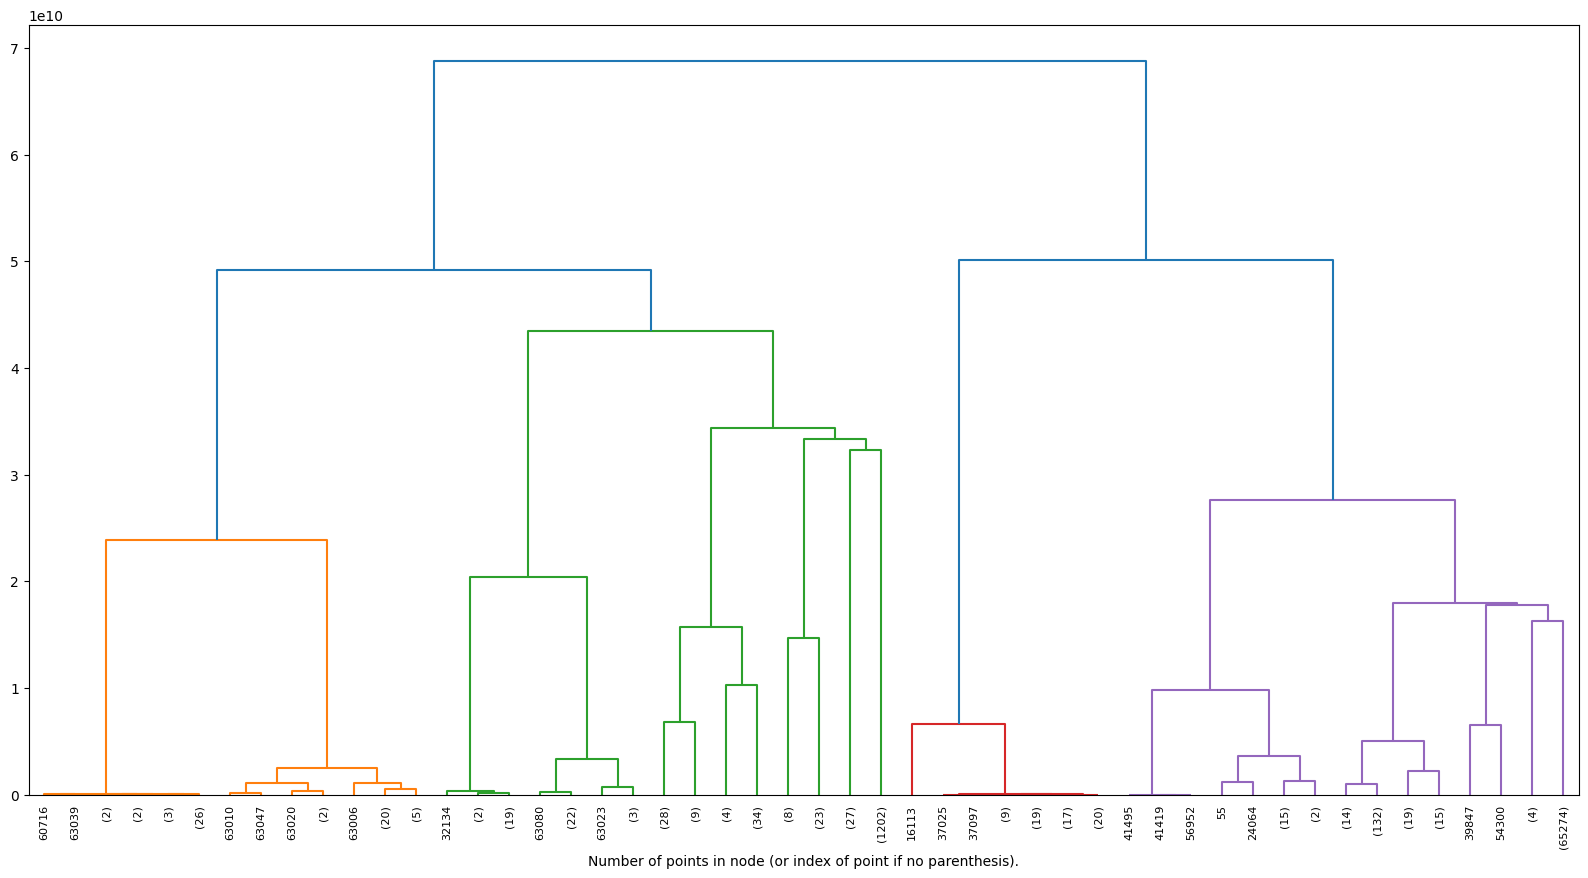

In [47]:
# plot the top ten levels of the dendrogram
plt.figure(figsize=(20, 10))
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig('dendogram_agglomerative.svg')
plt.show()

In [42]:
labels = model.fit_predict(X_new)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [ ]:
n_clusters = len(np.unique(labels))

# Calculate centroids of each cluster
centroids = []
for label in np.unique(labels):
    centroid = np.mean(X_new[labels == label], axis=0)
    centroids.append(centroid)

# Calculate within-cluster sum of squared errors (SSE)
sse = 0
for label, centroid in zip(np.unique(labels), centroids):
    sse += np.sum((X_new[labels == label] - centroid) ** 2)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(X_new, labels)

print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg,
      "SSE: ", sse
     )